In [1]:
import numpy as np
import scipy.signal as sig
import scipy.fft as fft
import matplotlib.pyplot as plt

In [2]:
def plt_fft(u):
    ufft = fft.fftshift(fft.fft(u))
    ufft_abs =  ufft.real**2 + ufft.imag**2
    plt.plot(fft.fftshift(fft.fftfreq(len(u))), ufft_abs)

In [58]:
def plot_response(w, h, title):
    "Utility function to plot response functions"
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(w/2/np.pi, 20*np.log10(np.abs(h)))
    ax.set_ylim(-60, 5)
    ax.set_xlim(0, 0.5)
    ax.grid(True)
    ax.set_xlabel('Normalized Frequency')
    ax.set_ylabel('Gain (dB)')
    ax.set_title(title)

In [67]:
cutoff = 0.25    # Desired cutoff frequency
trans_width = 0.05  # Width of transition from pass band to stop band
numtaps = 51      # Size of the FIR filter - carefull, a high-pass filter requires an off filter order!

taps = sig.remez(numtaps, [0, cutoff - trans_width, cutoff, 0.5], [0, 1], fs=1.0)

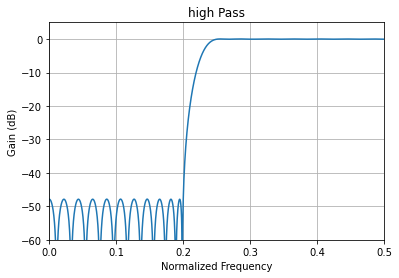

In [68]:
w, h = sig.freqz(taps, [1], worN=2000)
plot_response(w,h, "high Pass")

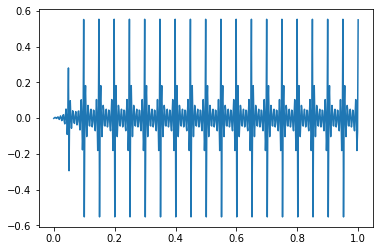

In [93]:
N = 500
#t = np.linspace(0, N, N+1)
#theta = 0.4
#u = np.sin(t*theta*2*np.pi)

t = np.linspace(0,1,N)
u = sig.sawtooth(2 * np.pi * 20 * t)
u = sig.lfilter(taps, [1], u)

plt.plot(t,u)

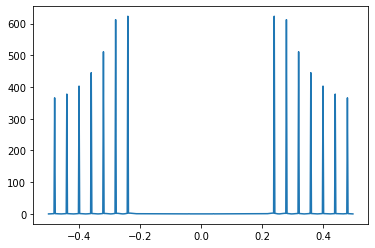

In [94]:
plt_fft(u)

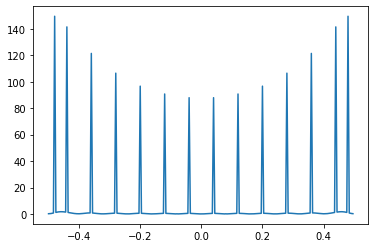

In [95]:
v = u[::2]
plt_fft(v)

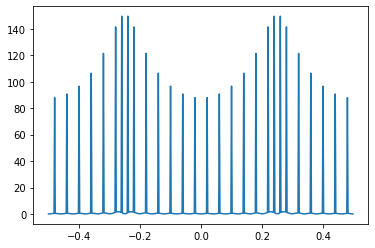

In [97]:
#uhat = np.zeros(N+1)
uhat = np.zeros(N)
uhat[::2] = v
# plt.plot(uhat)
# uhat
plt_fft(uhat)

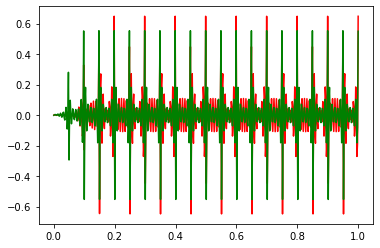

In [98]:
uhat_filter = 2*sig.lfilter(taps,[1],uhat)
plt.plot(t,uhat_filter,'r-', t,u,'-g')

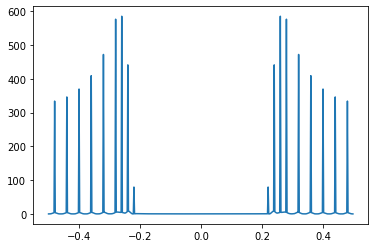

In [99]:
plt_fft(uhat_filter)

In [92]:
np.sum(np.abs(u - uhat_filter)**2) / np.sum(np.abs(u)**2)

0.04989717822343533